In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Train', target_size = (40, 40), 
                                                 batch_size = 30, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('Dataset/Test', target_size = (40, 40), 
                                                 batch_size = 30, class_mode = 'categorical')

Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

In [6]:
svm = tf.keras.models.Sequential()

svm.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (40, 40, 3)))
svm.add(MaxPooling2D(pool_size = (2, 2)))

svm.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
svm.add(MaxPooling2D(pool_size = (2, 2)))

svm.add(Flatten())

svm.add(Dense(units = 128, activation = 'relu'))

svm.add(Dense(units = 50, kernel_regularizer = tf.keras.regularizers.l2(0.01), activation ='softmax'))

svm.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [7]:
svm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

In [8]:
tf_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [15]:
logs = svm.fit(training_set, validation_data = test_set, epochs = 300, callbacks=[tf_callback])

Epoch 1/300
400/400 [==============================] - 21s 51ms/step - loss: 1.0120 - accuracy: 0.6315 - val_loss: 1.0091 - val_accuracy: 0.6693
Epoch 2/300
400/400 [==============================] - 24s 59ms/step - loss: 1.0082 - accuracy: 0.6818 - val_loss: 1.0070 - val_accuracy: 0.6923
Epoch 3/300
400/400 [==============================] - 24s 59ms/step - loss: 1.0061 - accuracy: 0.7097 - val_loss: 1.0055 - val_accuracy: 0.7170
Epoch 4/300
400/400 [==============================] - 25s 62ms/step - loss: 1.0046 - accuracy: 0.7277 - val_loss: 1.0027 - val_accuracy: 0.7497
Epoch 5/300
400/400 [==============================] - 26s 66ms/step - loss: 1.0028 - accuracy: 0.7534 - val_loss: 1.0030 - val_accuracy: 0.7520
Epoch 6/300
400/400 [==============================] - 29s 72ms/step - loss: 1.0010 - accuracy: 0.7811 - val_loss: 1.0014 - val_accuracy: 0.7760
Epoch 7/300
400/400 [==============================] - 26s 64ms/step - loss: 0.9996 - accuracy: 0.7996 - val_loss: 1.0003 - val_ac

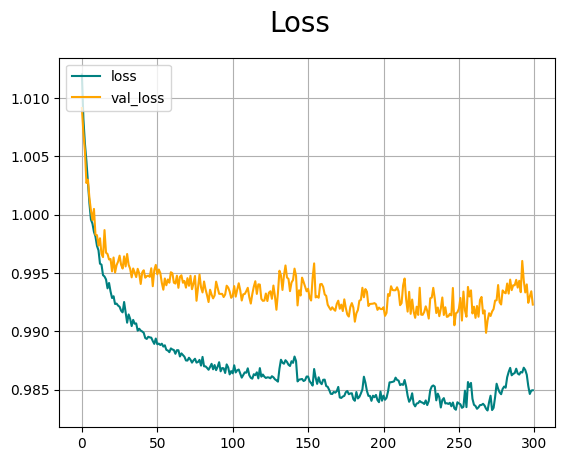

In [16]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(logs.history['loss'], color='teal', label='loss')
plt.plot(logs.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.grid()
plt.show()

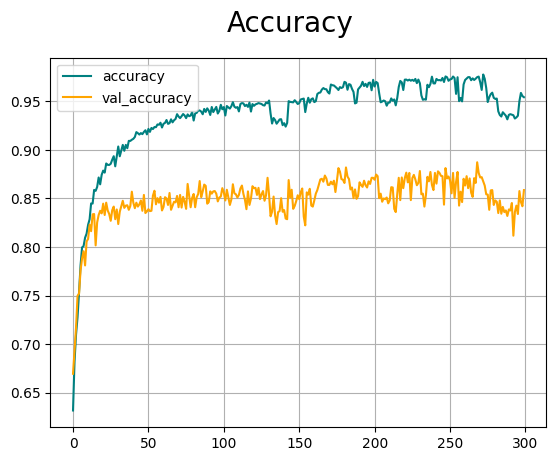

In [17]:
fig = plt.figure()
plt.plot(logs.history['accuracy'], color='teal', label='accuracy')
plt.plot(logs.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [22]:
from tensorflow.keras.models import load_model
import os

In [23]:
svm.save(os.path.join('models','svmB3.h5'))